In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [38]:
# reading input
input_file = 'BatteryLog06Mar18.csv'
data = pd.read_csv(input_file)

In [39]:
# preview
data.head()

,datetime,level,temperature,voltage,status
0,2018-03-06 19:02:09,100,25.2,4289,Unplugged
1,2018-03-06 19:04:39,99,27.7,4179,Use
2,2018-03-06 19:06:39,98,33.0,4015,Use
3,2018-03-06 19:08:09,97,34.6,4000,Use
4,2018-03-06 19:10:40,96,35.7,4000,Use


In [40]:
# time string -> elapsed seconds
dtime = pd.to_datetime(data.datetime)
tdelta = dtime - dtime[0]
tseconds = tdelta.map(lambda x : x.total_seconds())
data['elapsed_seconds'] = tseconds

In [41]:
# preview
data.head()

,datetime,level,temperature,voltage,status,elapsed_seconds
0,2018-03-06 19:02:09,100,25.2,4289,Unplugged,0.0
1,2018-03-06 19:04:39,99,27.7,4179,Use,150.0
2,2018-03-06 19:06:39,98,33.0,4015,Use,270.0
3,2018-03-06 19:08:09,97,34.6,4000,Use,360.0
4,2018-03-06 19:10:40,96,35.7,4000,Use,511.0


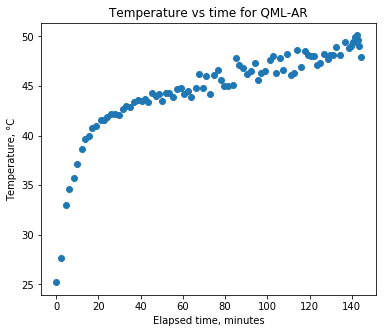

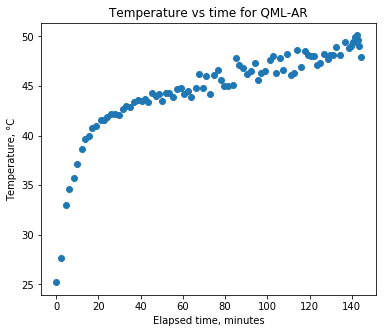

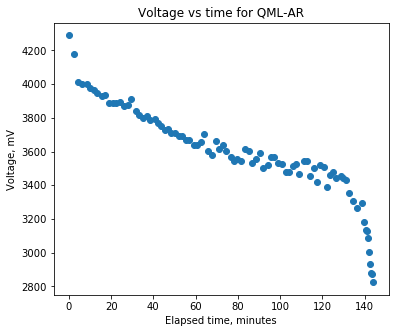

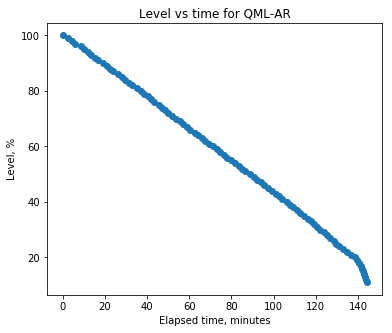

In [42]:
# plotting charts
fields = ['temperature', 'voltage', 'level']
units = ['°C', 'mV', '%']
for f, u in zip(fields, units):
    plt.figure(figsize = (6, 5))
    plt.title(f.title() + ' vs ' + 'time for QML-AR')
    plt.xlabel('Elapsed time, minutes')
    plt.ylabel(f.title() + ', ' + u)
    plt.scatter(data['elapsed_seconds'] / 60., data[f])
    plt.savefig(input_file + '_' + f + '.png', bbox_inches = 'tight')
    plt.show()